<a href="https://colab.research.google.com/github/jeetshah0303/Artificialintelligence/blob/main/Statistical_approach_Anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import seaborn as sns 
from scipy import stats 
import matplotlib.pyplot as plt

In [2]:
data=np.random.randn(50000)*20+20

In [3]:
len(data)

50000

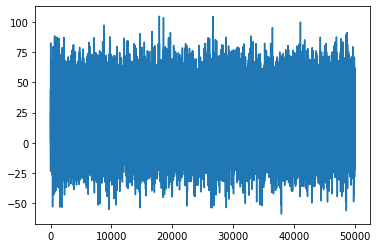

In [4]:
plt.plot(data)

In [5]:
random_data_std=np.std(data)
random_data_mean=np.mean(data)
anomaly_cut_off=random_data_std*3

In [7]:
lower_limit=random_data_mean- anomaly_cut_off
upper_limit=random_data_mean+ anomaly_cut_off

In [8]:
print(upper_limit,lower_limit)

80.22909716084132 -40.21570417497003


In [11]:
#defining a list to store the anomalies 
anomalies=[]
#generate the outliers
for outlier in data:
  if outlier>upper_limit or outlier<lower_limit:
    anomalies.append(outlier)

In [12]:
len(anomalies)

143

In [13]:
anomalies

[82.57009841091428,
 -53.14326539568029,
 -43.0378920216026,
 -41.01925285816921,
 -41.2656848181042,
 88.43957512068376,
 83.62604654144758,
 87.00554485765628,
 87.12435375597205,
 87.509176481701,
 86.33269198711648,
 -53.282447946423204,
 -46.51025768295551,
 -44.342784656836656,
 -43.334302858478615,
 -53.55166999918043,
 87.19482184401652,
 -43.26295325040259,
 80.60325718616383,
 81.08123771091212,
 -42.75744325721469,
 83.18780481472295,
 86.98360530269083,
 -41.599659939411396,
 -51.61379345981017,
 -50.734560416576144,
 83.57315627096781,
 81.1829000275455,
 97.32762524908479,
 -40.633672892146905,
 -44.57938855139609,
 -55.25777832028476,
 87.69220025535815,
 -46.21233106819025,
 -43.525347537037355,
 -51.52602248239309,
 -40.40440361108637,
 86.52667034968451,
 83.91506458311322,
 84.52468688205447,
 81.9560455761756,
 80.40707084938747,
 -43.08927459576437,
 -41.37361395195097,
 90.28492323196662,
 -53.852517200367004,
 83.21181125125145,
 -44.04336843180593,
 92.092299005

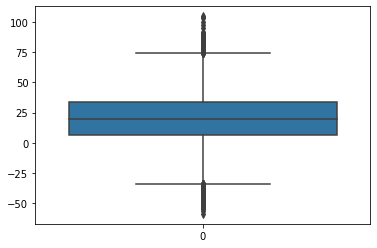

In [15]:
sns.boxplot(data=data)

In [16]:
#outliers using z score
z=np.abs(stats.zscore(data))

In [17]:
z

array([0.21441844, 0.35070149, 0.84414586, ..., 0.46339351, 0.05563347,
       0.55615463])

In [18]:
threshold=3
print(np.where(z>threshold))

(array([   24,   337,   517,   616,   664,   667,   677,   689,   806,
        1041,  1386,  1550,  1689,  1732,  1807,  1840,  2183,  2295,
        3658,  3782,  6176,  6301,  7177,  7203,  7812,  8116,  8563,
        8746,  8788,  9160,  9305,  9578,  9725, 10425, 10756, 10781,
       11365, 12031, 12507, 12684, 13726, 13888, 13942, 14602, 14668,
       14696, 15405, 15691, 16671, 17057, 17125, 17708, 17870, 17881,
       18475, 18550, 18716, 19385, 19694, 19954, 20010, 20220, 22182,
       22458, 22478, 23554, 23748, 24416, 24760, 25396, 25799, 25877,
       26118, 26327, 26349, 26562, 26693, 26700, 26817, 27087, 27170,
       27277, 27765, 28153, 28362, 28728, 28830, 28872, 29014, 29292,
       30057, 31625, 31785, 31939, 31995, 32579, 32968, 33289, 33737,
       33858, 34351, 34385, 34405, 34697, 35170, 36159, 36323, 36450,
       36619, 37837, 37874, 37930, 38990, 40834, 40982, 41047, 41049,
       41463, 41739, 42213, 42908, 42988, 44318, 44459, 45039, 45225,
       45497, 46245

In [20]:
#code for scatter plot 
from sklearn.datasets import load_boston
import pandas as pd

In [21]:
boston=load_boston()
X,y=load_boston(return_X_y=True)

In [22]:
columns=boston.feature_names
df= pd.DataFrame(X,columns=columns)

In [23]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


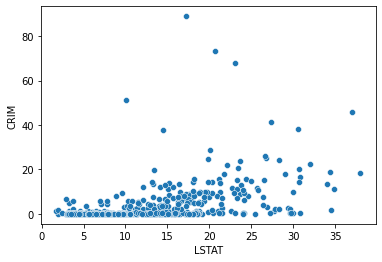

In [24]:
#scatter plot 
ax=sns.scatterplot(x='LSTAT',y='CRIM',data=df)

In [25]:
import scipy as sp
from scipy.stats import chi2
from sklearn.covariance import MinCovDet

In [32]:
def mahalanobis_method(df):
  x_minus_mu=df-np.mean(df)
  cov=np.cov(df.values.T)
  inv_covmat=sp.linalg.inv(cov)
  left_term=np.dot(x_minus_mu,inv_covmat)
  mahal=np.dot(left_term,x_minus_mu.T)
  md=np.sqrt(mahal.diagonal())

  outlier=[]
  C=np.sqrt(chi2.ppf((1-0.001),df=df.shape[1]))
  for index,value in enumerate(md):
    if value>C:
      outlier.append(index)
  return outlier,md

In [33]:
outliers_mahal,md=mahalanobis_method(df=df)

In [34]:
outliers

24.31096079853337

In [35]:
md

array([ 2.7475433 ,  2.1475826 ,  2.22992563,  2.63223623,  2.67156878,
        2.5462608 ,  2.46143968,  3.77489539,  5.06973569,  3.69799652,
        4.10412371,  3.30637776,  2.80134502,  2.44191765,  2.52209363,
        2.46244022,  3.20877319,  2.22434797,  3.30961606,  2.28046321,
        2.87040716,  2.38884962,  2.64605694,  2.8755343 ,  2.61194437,
        2.66411226,  2.59936324,  2.66876963,  2.75200453,  2.5910753 ,
        2.96271267,  2.83708257,  4.06964179,  2.63507398,  3.23413335,
        1.99259015,  1.97320639,  2.20668974,  2.60402024,  3.83622642,
        3.94378887,  3.54555118,  3.24787949,  3.26969881,  2.12409317,
        2.38011777,  2.51857979,  3.17419272,  4.9543289 ,  2.68126979,
        2.34115426,  2.58691769,  2.3363676 ,  2.43508216,  4.96471496,
        4.13494498,  3.80277052,  4.39757374,  2.85747642,  2.4321185 ,
        3.0076083 ,  3.78922642,  3.08253783,  3.06905812,  4.27726848,
        3.44834958,  3.69469345,  2.46168453,  2.36895698,  2.20